# Part 1 - Identify the churn with the Self-Organizing Map

In [58]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [59]:
# Importing the dataset
dataset = pd.read_csv('churn.csv')

In [60]:
dataset.rename(columns={'Unnamed: 0':'id',},inplace=True)

In [61]:
dataset=pd.get_dummies(dataset, drop_first=True)

In [62]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [63]:
dataset.head()

,id,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,1,34,56.95,1889.50,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2,2,53.85,108.15,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,3,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,4,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


## Scaling

In [64]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## SOM

In [65]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 31, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

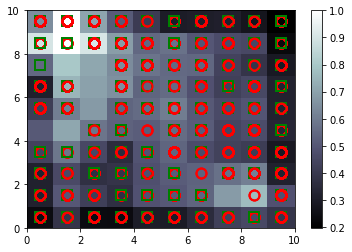

In [66]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [73]:
# Finding the churn
mappings = som.win_map(X)
churn = np.concatenate((mappings[(1,9)], mappings[(1,8)]), axis = 0)
churn = sc.inverse_transform(churn)

In [74]:
churn[0]

array([ 84.  ,  49.  ,  20.15, 973.35,   0.  ,   0.  ,   1.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   1.  ,
         0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   1.  ,   1.  ,   0.  ,   0.  ,   0.  ])

In [75]:
churn.shape

(213, 31)

In [76]:
dataset[dataset['id']==299]

,id,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
299,299,1,73.6,73.6,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,1,1


# Part 2 - Going from Unsupervised to Supervised Deep Learning

In [77]:
# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

In [78]:
# Creating the dependent variable
is_churn = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in churn:
        is_churn[i] = 1

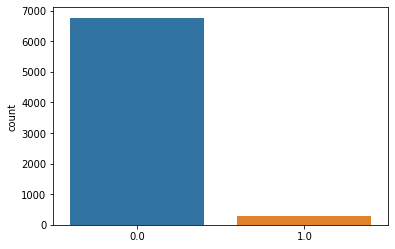

In [79]:
sns.countplot(is_churn)

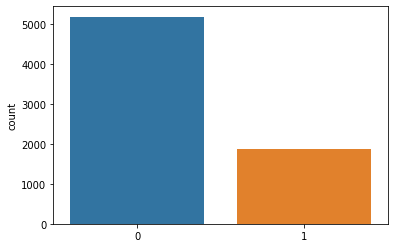

In [80]:
sns.countplot(y)

In [82]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

In [83]:
print(classification_report(y,is_churn))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      5174
           1       0.14      0.02      0.04      1869

    accuracy                           0.71      7043
   macro avg       0.44      0.49      0.43      7043
weighted avg       0.57      0.71      0.62      7043



In [84]:
print(confusion_matrix(y,is_churn))

[[4941  233]
 [1830   39]]
